In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

# Clean data

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [12]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# Feature Columns 

In [13]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
import tensorflow as tf

# Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [20]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_blood = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedi = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# Category Features 

In [17]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

## Converting Continuous to Categorical

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

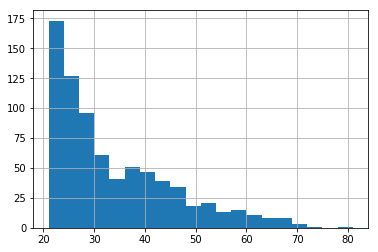

In [19]:
diabetes['Age'].hist(bins = 20)

In [21]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

## Putting them together

In [23]:
feat_cols = [num_preg, plasma_gluc, dias_blood, triceps, insulin, bmi, diabetes_pedi, age_buckets, assigned_group]

# Train Test Split

In [24]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [25]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [26]:
x_data = diabetes.drop("Class", axis = 1)

In [27]:
labels = diabetes["Class"]

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

In [33]:
X_train.shape

(537, 9)

# Create Input and Model

In [34]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

In [35]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmp_ygnblb_', '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600}


In [36]:
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Admin\AppData\Local\Temp\tmp_ygnblb_\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 277.75
INFO:tensorflow:loss = 3.69442, step = 101 (0.355 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 4.66606, step = 201 (0.282 sec)
INFO:tensorflow:global_step/sec: 326.603
INFO:tensorflow:loss = 5.53206, step = 301 (0.310 sec)
INFO:tensorflow:global_step/sec: 317.302
INFO:tensorflow:loss = 4.80975, step = 401 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.466
INFO:tensorflow:loss = 7.00368, step = 501 (0.322 sec)
INFO:tensorflow:global_step/sec: 293.18
INFO:tensorflow:loss = 5.42292, step = 601 (0.341 sec)
INFO:tensorflow:global_step/sec: 329.826
INFO:tensorflow:loss = 3.47618, step = 701 (0.303 sec)
INFO:tensorflow:global_step/sec: 341.045
INFO:tensorflow:loss = 6.81297, step = 801 (0.288 sec)
INFO:tensorflow:global_step/sec: 325.544
INFO

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [38]:
results = model.evaluate(input_fn = eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-06-06-12:08:12
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmp_ygnblb_\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-06-06-12:08:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.727273, accuracy_baseline = 0.649351, auc = 0.799753, auc_precision_recall = 0.648651, average_loss = 0.526972, global_step = 1000, label/mean = 0.350649, loss = 5.0721, prediction/mean = 0.341814


In [39]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79975307,
 'auc_precision_recall': 0.64865071,
 'average_loss': 0.5269717,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.072103,
 'prediction/mean': 0.34181353}

In [40]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, 
                                                      num_epochs = 1, shuffle = False)

In [41]:
predictions = model.predict(pred_input_func)

In [42]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmp_ygnblb_\model.ckpt-1000


In [43]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.49429807], dtype=float32),
  'logits': array([-0.02280867], dtype=float32),
  'probabilities': array([ 0.50570196,  0.4942981 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.59013611], dtype=float32),
  'logits': array([ 0.36452818], dtype=float32),
  'probabilities': array([ 0.40986386,  0.59013611], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36342779], dtype=float32),
  'logits': array([-0.56051731], dtype=float32),
  'probabilities': array([ 0.63657224,  0.36342779], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.29863471], dtype=float32),
  'logits': array([-0.85380781], dtype=float32),
  'probabilities': array([ 0.70136529,  0.29863468], dtype=flo

# Dense Neural Network 

In [44]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmp1zwpfpv8', '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600}


In [45]:
dnn_model.train(input_fn = input_func, steps = 1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [47]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension = 4)

In [49]:
feat_cols = feat_cols = [num_preg, plasma_gluc, dias_blood, triceps, insulin, bmi, diabetes_pedi, age_buckets, embedded_group_column]

In [60]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 20, 20, 10], feature_columns = feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpotdbi9pi', '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600}


In [61]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

In [62]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Admin\AppData\Local\Temp\tmpotdbi9pi\model.ckpt.
INFO:tensorflow:loss = 7.06409, step = 1
INFO:tensorflow:global_step/sec: 336.465
INFO:tensorflow:loss = 5.35362, step = 101 (0.298 sec)
INFO:tensorflow:global_step/sec: 336.468
INFO:tensorflow:loss = 5.59738, step = 201 (0.303 sec)
INFO:tensorflow:global_step/sec: 293.178
INFO:tensorflow:loss = 3.74103, step = 301 (0.343 sec)
INFO:tensorflow:global_step/sec: 323.444
INFO:tensorflow:loss = 5.44143, step = 401 (0.306 sec)
INFO:tensorflow:global_step/sec: 364.608
INFO:tensorflow:loss = 5.05604, step = 501 (0.276 sec)
INFO:tensorflow:global_step/sec: 341.044
INFO:tensorflow:loss = 4.55729, step = 601 (0.292 sec)
INFO:tensorflow:global_step/sec: 393.207
INFO:tensorflow:loss = 5.04853, step = 701 (0.248 sec)
INFO:tensorflow:global_step/sec: 360.673
INFO:tensorflow:loss = 3.6887, step = 801 (0.280 sec)
INFO:tensorflow:global_step/sec: 417.78
INFO

In [63]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [64]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-06-06-12:28:43
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpotdbi9pi\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-06-06-12:28:44
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.810617, auc_precision_recall = 0.678304, average_loss = 0.526297, global_step = 1000, label/mean = 0.350649, loss = 5.06561, prediction/mean = 0.366491


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81061727,
 'auc_precision_recall': 0.6783042,
 'average_loss': 0.52629739,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0656123,
 'prediction/mean': 0.36649072}